# Double pendulum (Homework 04)

## Part 1

Let us now describe the motion of a double pendulum. 

The double pendulum is displayed in figure (figure from Wikipedia; credit to JabberWok)
![title](170px-Double-Pendulum.svg.png)

The two masses are connected by rigid massless sticks. As a simplification, we aslo assume that the top stick is not connected to a ceiling, but to a nail (so it can go all the way around and we do not have to worry about collisions with the celiing).

Deriving the equation of motion is very tedious, so I save you the effort. We write the equation of motion for the angles, $\theta_1$ and $\theta_2$, between the two sticks and the vertical.

The equations of motion for the two angles are

\begin{equation}
    \frac{d^2\theta_1}{dt^2} = \frac{
        - g (2 m_1+m_2) \sin \theta_1 
        - m_2 g \sin(\theta_1-2\theta_2) 
        - 2 \sin(\theta_1-\theta_2)\, m_2 
            \left( \left(\frac{d\theta_2}{dt} \right)^2 L_2 +  
                \left(\frac{d\theta_1}{dt} \right)^2 L_1 \cos\left( \theta_1-\theta_2 \right)\right)}{
        L_1 \left(2 m_1 + m_2 - m_2 \cos\left(2 \theta_1-2\theta_2 \right) \right)
                }
\end{equation}

\begin{equation}
    \frac{d^2\theta_2}{dt^2} = \frac{
        2 \sin\left( \theta_1- \theta_2 \right)\left(
             \left(\frac{d\theta_1}{dt} \right)^2 L_1 \left(m_1 + m_2 \right) + 
             g \left(m_1 + m_2 \right) \cos\theta_1 + 
             \left(\frac{d\theta_2}{dt} \right)^2 L_2 m_2 \cos\left( \theta_1- \theta_2 \right)
        \right)
                }{L_2 \left(2 m_1 + m_2 - m_2 \cos\left(2 \theta_1-2\theta_2 \right) \right)}
\end{equation}

The equations of motion need initial conditions. Let us assume for simplicity that the initial angular velocities are 0, and that the initial angles are chosen by the user.

Write a python function that takes as input:
- mass of the mass 1 $m_1$ in kg
- mass of the mass 2 $m_2$ in kg
- length of the stick 1 $L_1$ in m
- length of the stick 2 $L_2$ in m
- initial value of angle $\theta_1(t=t_0)$ in rad
- initial value of angle $\theta_2(t=t_0)$ in rad
- initial time 
- final time
- tolerance on the error on the angles

The python function should output:
- times at which the two angles have been calculated
- angle 1 at the above times
- angle 2 at the above times

The python function should calculate the above quantities using adaptive time step RK4 (with step doubling).


After constructing the python function above, use its output to plot the trajectories:
- angle 1 in dependence of time
- angle 2 in dependence of time
- xy position of mass 1 (you need to figure out how it depends on $\theta_1$)
- xy position of mass 2 (you need to figure out how it depends on $\theta_1$ and $\theta_2$)

You do not need to make an animation, just a plot. 
You can create an animation for your own extra training, but it will not be graded.

Below you find the definitions of the functions you will need (notice that they have been slightly modified from class to make sure that they work with this problem). There is no need to program them again, just use them.

### First-order differential equations

\begin{equation}
    \frac{d\theta_1}{dt} = \omega_1
\end{equation}

\begin{equation}
    \frac{d\theta_2}{dt} = \omega_2
\end{equation}

\begin{equation}
    \frac{d\omega_1}{dt} = \frac{
        - g (2 m_1+m_2) \sin \theta_1 
        - m_2 g \sin(\theta_1-2\theta_2) 
        - 2 \sin(\theta_1-\theta_2)\, m_2 
            \left( \left(\omega_2 \right)^2 L_2 +  
                \left(\omega_1 \right)^2 L_1 \cos\left( \theta_1-\theta_2 \right)\right)}{
        L_1 \left(2 m_1 + m_2 - m_2 \cos\left(2 \theta_1-2\theta_2 \right) \right)
                }
\end{equation}

\begin{equation}
    \frac{d\omega_2}{dt} = \frac{
        2 \sin\left( \theta_1- \theta_2 \right)\left(
             \left(\omega_1 \right)^2 L_1 \left(m_1 + m_2 \right) + 
             g \left(m_1 + m_2 \right) \cos\theta_1 + 
             \left(\omega_2 \right)^2 L_2 m_2 \cos\left( \theta_1- \theta_2 \right)
        \right)
                }{L_2 \left(2 m_1 + m_2 - m_2 \cos\left(2 \theta_1-2\theta_2 \right) \right)}
\end{equation}

### XY positions of mass 1 and mass 2

\begin{equation}
    x_1 = L_1sin\theta_1 \\
    y_1 = -L_1cos\theta_2 \\
    x_2 = L_1sin\theta_1 + L_2sin\theta_2 \\
    y_2 = -L_1cos\theta_1 - L_2cos\theta_2 \\
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

def rungeKutta4StepperError(operator, initCond, time, dt):
    ''' 
    Performs a step composed of 2 RK4 steps an ODE of type dy(t)/dt = f(t,y(t))
    Then performs a single step of RK4 and uses the different solutions to estimate the error
    
    Parameters
        ----------
        operator : function
            function of time (: float) and the y (: float / numpy.array)
            NOTICE: it must a function of both variables even if not explicitly dependence on both
            For instance:   lambda t, y: np.sin(y)    and not     lambda y: np.sin(y) 
        initCond : float / numpy.array
            initial condition, i.e. y(t = initial time)
        initTime : float
            initial time
        dt       : float
            delta t of the step (notice that each substep will act at dt/2)
        
    Returns
        ----------
        solution : numpy.array
            numpy array of the calculated y at the end of the step
        error    : float
            estimation of the error
    '''
    # Performs a RK step for the first half step
    k1A = operator(time, initCond)
    k2A = operator(time + dt/4, initCond + dt * k1A/4 )
    k3A = operator(time + dt/4, initCond + dt * k2A/4 )
    k4A = operator(time + dt/2, initCond + dt * k3A/2)
    
    yhalf = initCond + dt * (k1A + 2*k2A + 2*k3A + k4A)/12

    # Performs a RK step for the first half step
    k1B = operator(time + dt/2, yhalf)
    k2B = operator(time + 3*dt/4, yhalf + dt * k1B/4 )
    k3B = operator(time + 3*dt/4, yhalf + dt * k2B/4 )
    k4B = operator(time + dt, yhalf + dt * k3B/2)
            
    ydoublestep = yhalf + dt * (k1B + 2*k2B + 2*k3B + k4B)/12
    
    ########## Finds the source of error, NaN values are inputted when doublestepping

    for value in ydoublestep:
        if pd.isnull(value) == True:
            print("NaN value spotted: ", ydoublestep)
        else:
            continue

    # Performs RK4 again but by taking a single large step 
    # Does not recalculate the first k, since it it the same as in the 
    # previous case
    k2 = operator(time + dt/2, initCond + dt * k1A/2 )
    k3 = operator(time + dt/2, initCond + dt * k2/2 )
    k4 = operator(time + dt, initCond + dt * k3)
    
    ysinglestep = initCond + dt * (k1A + 2*k2 + 2*k3 + k4)/6 
    
    # calculates the error using the function norm to allow for the use with vectors
    error = np.linalg.norm(ydoublestep-ysinglestep)/16
    
    return ydoublestep, error


def rungeKutta4Adaptive(operator, initCond, initTime, finalTime, tolerance, minimumStep):
    ''' 
    Performs a RK4 time stepping of an ODE of type dy(t)/dt = f(t,y(t))
    The time steps are not chosen by the user, but adaptively decided by
    comparing the provided tolerance to the error estimation calculated 
    with the double step method
    
    Parameters
        ----------
        operator    : function
            function of time (: float) and the y (: float / numpy.array)
            NOTICE: it must a function of both variables even if not explicitly dependence on both
            For instance:   lambda t, y: np.sin(y)    and not     lambda y: np.sin(y) 
        initCond    : float / numpy.array
            initial condition, i.e. y(t = initial time)
        initTime    : float
            initial time
        finalTime   : float
            final time of the simulation
        minimumStep : float
            minimum step allowed. This is to prevent the method from requiring too many iterations
            
    Returns
        ----------
        times : numpy.array
            numpy array of the calculated times
        solution    : float
            numpy array of the calculated y's 
    '''
    
    maxIncrementOfdt = 3
    tolerance = abs(tolerance)
    
    ##### Smaller interval Used to avoid large steps
    
    dt = (finalTime - initTime)*0.01
    reachedEnd = False
    reachedMinimumStep = False
    currentError = 10*tolerance + 1
    times = np.array([initTime])
    solution = [initCond]
        
    while (not(reachedEnd)):
        newy, error = rungeKutta4StepperError(operator, solution[-1], times[-1], dt)
        
        if (error <= tolerance or reachedMinimumStep):
            times = np.append(times,times[-1]+dt)
            solution.append(newy)
            if (abs(times[-1]-finalTime)<minimumStep): 
                reachedEnd = True
            dt = dt * (tolerance / error)**(0.25)
            if dt > minimumStep:
                reachedMinimumStep = False
            else:
                dt = minimumStep
            dt = min(dt, finalTime-times[-1])
        else : 
            dt = dt * (tolerance / error)**(0.25)
            if dt < minimumStep:
                dt = minimumStep
                reachedMinimumStep = True
                
    return times, np.array(solution)

##### Hints

- Watch out, these are 2 second order ordinary differential equations, so you first need to transform them into 4 first order ODE. 
- Your solution, initial condition and operator that gives the derivatives are going to be in vectors. Decide which element of the vector corresponds to what variable of the system and stick to that.
- This problem is very similar to the problem of the planetary motion

## doublePendulum Function

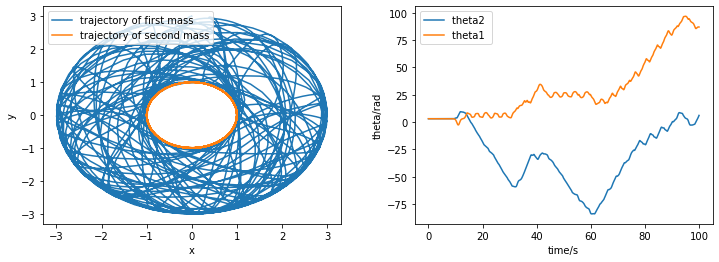

In [15]:
import sys
m1 = 2.
m2 = 1.
L1 = 1.
L2 = 2.
tolerance = 1.e-6

def doublePendulum(m1, m2, L1, L2, initTheta1, initTheta2, initTime, finalTime, 
                   tolerance, minimumStep = 1.e-3 ):
    
    ##### checks for the error when both initial angle inputs are zero
    
    if initTheta1 + initTheta2 == 0:
        print ("Use another combination of initial angles which do not add up to zero")
        sys.exit()
    
    else:
        g = 9.81

        # solvec[0] = theta1
        # solvec[1] = theta2
        # solvec[2] = omega_1
        # solvec[3] = omega_2

        operator = lambda t, solvec: np.array([
                     solvec[2],
                     solvec[3], 

                    (-g*(2*m1+m2)*np.sin(solvec[0]) -m2*g*np.sin(solvec[0]-2*solvec[1]) - \
                     2*np.sin(solvec[0]-solvec[1])*m2*((solvec[3]**2)*L2+(solvec[2]**2)*L1*np.cos(solvec[0]-solvec[1]))) / \
                    (L1*(2*m1+m2-m2*np.cos(2*solvec[0]-2*solvec[1]))), 

                    (2*np.sin(solvec[0]-solvec[1])*((solvec[2]**2)*L1*(m1+m2) + \
                    g*(m1+m2)*np.cos(solvec[0]) + (solvec[3]**2)*L2*m2*np.cos(solvec[0]-solvec[1]))) / \
                    (L2*(2*m1+m2-m2*np.cos(2*solvec[0]-2*solvec[1]))) ])

        initAngVel1 = 0
        initAngVel2 = 0

        initCond = [initTheta1, initTheta2, initAngVel1, initAngVel2]

        times, solution = rungeKutta4Adaptive(operator, initCond, initTime, 
                                              finalTime, tolerance , minimumStep)

        return times, np.array(solution[:,0]), np.array(solution[:,1])

times, theta1, theta2 = doublePendulum(m1, m2, L1, L2, np.pi, np.pi, 0, 100, tolerance)

x1 = L1*np.sin(theta1)
y1 = -L1*np.cos(theta1) 
x2 = L1*np.sin(theta1) + L2*np.sin(theta2)
y2 = -L1*np.cos(theta1) - L2*np.cos(theta2)

fig, axs = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.25); 
axs[0].plot(x2,y2, label = "trajectory of first mass");
axs[0].plot(x1,y1, label = "trajectory of second mass");
axs[0].set_xlabel('x'); axs[0].set_ylabel('y'); axs[0].legend()
axs[1].plot(times, theta2, label = "theta2 ");
axs[1].plot(times, theta1, label = "theta1 ");
axs[1].set_xlabel('time/s'); axs[1].set_ylabel('theta/rad'); axs[1].legend();

## Animation

In [4]:
coords = np.array([x1,x2,y1,y2])
XYcoords = np.transpose(coords)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Enable HTML5 video output.
from matplotlib import animation, rc
rc('animation', html='html5')
     
def animate_oscillation(L):

    ## Set up the drawing area
    fig = plt.figure(figsize=(8,8))
    plt.xlim(-L,L)
    plt.ylim(-L,L)
    
    ## Draw the static parts of the figure
    plt.xlabel('x'); plt.ylabel('y');

    ## Initialize the plot objects to be animated (`line', `circ', `dash')
    ## with empty plot data.  They'll be used by the `animate` subroutine.
    xfix, yfix = 0, 0
    mass1,  = plt.plot([], [], 'o', color='red', markersize=15)
    mass2,  = plt.plot([], [], 'o', color='blue', markersize=15)
    line1,  = plt.plot([], [], color='orange', linewidth=0.5)
    line2,  = plt.plot([], [], color='blue', linewidth=0.3)
    ln, = plt.plot([], [], 'red', animated=True)
    plt.plot([xfix], [yfix], color= 'black',linewidth=0.3)
    ln2, = plt.plot([], [], 'blue', animated=True)
    plt.close()
    
    numFrames = 500
    totalSteps = len(times)
    stepsAtFrame = totalSteps/numFrames
    
    
    ## Initialization function: plot the background of each frame
    def init():
        mass1.set_data([], [])
        mass2.set_data([], [])
        line1.set_data([], [])
        line2.set_data([], [])
        return mass1, mass2, line1, line2

    ## Animation function. This is called sequentially for different
    ## integer n, running from 0 to nframes-1 (inclusive).
    def animate(n):
        index = int(stepsAtFrame*n)
        mass1.set_data(XYcoords[index,0],XYcoords[index,2])
        mass2.set_data(XYcoords[index,1],XYcoords[index,3])
        line1.set_data(XYcoords[:index,0],XYcoords[:index,2]) 
        line2.set_data(XYcoords[:index,1],XYcoords[:index,3])
        ln.set_data([xfix,XYcoords[index,0]], [yfix,XYcoords[index,2]])
        ln2.set_data([XYcoords[index,0],XYcoords[index,1]], [XYcoords[index,2],XYcoords[index,3]])
        return mass1, mass2, line1, line2, ln, ln2

    # Call the animator. blit=True means only re-draw the parts that have changed.
    animator = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=numFrames, interval=100, blit=True)
    return animator

animate_oscillation(L1+L2)

## Part 2

Now we want to understand how far the second mass travels from the vertical axis crossing the nail. To be more specific, we would like to understand what is the distance from that axis at a given time, averaged over all possible starting positions (i.e. all the possible starting angles $\theta_1(t=t_0)$ and $\theta_2(t=t_0)$).


### The distance from the axis

The x position of the second mass after a given time $t_F$

\begin{equation}
    x_2(t_F) = L_1 \sin(\theta_1(t_F)) + L_2 \sin(\theta_2(t_F))
\end{equation}

where $\theta_1(t_F)$ and $\theta_2(t_F)$ are the angles at the final time that you calculated in the previous homework.


Notice that the final angles depend on the inital conditions. So we can see the angles $\theta_1(t_F)$ and $\theta_2(t_F)$ at the final times as functions of the initial angles $\theta_{1,I}$ and $\theta_{2,I}$

\begin{align}
    \theta_1(t_F)  &= \theta_{1,F}(\theta_{1,I},\theta_{2,I})) \\
    \theta_2(t_F)  &= \theta_{2,F}(\theta_{1,I},\theta_{2,I})) 
\end{align}

For that reason we can see the final x position of the second mass as a function of the initial angles

\begin{equation}
    x_{2,F}(\theta_{1,I},\theta_{2,I}) = L_1 \sin(\theta_{1,F}(\theta_{1,I},\theta_{2,I})) + L_2 \sin(\theta_{2,F}(\theta_{1,I},\theta_{2,I}))
\end{equation}

We want to find the average final distance from the axix 

\begin{equation}
    <abs[x_2(t_F))]> = \frac{1}{4 \pi^2} \int_0^{2\pi} d\theta_{1,I} \int_0^{2\pi} d\theta_{2,I} \; abs\left[ L_1 \sin(\theta_{1,F}(\theta_{1,I},\theta_{2,I})) + L_2 \sin(\theta_{2,F}(\theta_{1,I},\theta_{2,I})) \right]
\end{equation}

Calculate this integral with Monte Carlo.

Disclaimer: In class we saw that Monte Carlo is not the best choise for this kind of problems as the integral is in low number of dimensions. This homework is only for training purposes. If you had to solve this problem in a real life you should use Gauss (not required for this homework).


Below you find the definitions of the functions you will need (notice that they have been slightly modified from class to make sure that they work with this problem). There is no need to program them again, just use them.

In [8]:
def basicMonteCarloIntegrationND (function, xVecMin, xVecMax, nMCPoints):
    
    print("Loading ... this might take awhile, depending the number of nMCPoints chosen")
    
    """
    Integrates the nD function within the provided rectangle with Monte Carlo
    
    Parameters
        ----------
        funcToUse  : function
            function of one variable
        xVecMin    : numpy array 
            lower limits of integration in all the directions
        xVecMax    : numpy array 
            higher limits of integration in all the directions
        nMCPoints :
            Number of Monte Carlo evaluations (the function will be evaluated this number fo times)
        
    Returns
        ----------
        integral : float
            definite integral of the function
    """
    nDim = len(xVecMin)
    xVecMinTiled = np.transpose(np.tile(xVecMin,(nMCPoints,1)))
    xVecDiffTiled = np.transpose(np.tile(xVecMax-xVecMin,(nMCPoints,1)))
    mCPoints = xVecMinTiled + xVecDiffTiled * np.random.rand(nDim,nMCPoints)

    result = 0.;
    
    for i in range (nMCPoints):
        result += function(mCPoints[:,i])
        
    return np.prod(xVecMax-xVecMin) * result /nMCPoints

##### Hints

- Monte Carlo needs a python function that gives the value of the mathematical function we want to integrate. This means that you need to construct it. Inside that you need to use the function you built in the previous homework, extract the result you need to produce the absolute value of the x position of the second mass and then return it.

## Monte Carlo Int to calculate average distance

In [17]:
m1 = 2.
m2 = 1.
L1 = 1.
L2 = 2.
nMCPoints = 50

######## doublePendulum(...)[1][-1] == theta1 at the final time for a chosen input angles
######## doublePendulum(...)[2][-1] == theta2 at the final time for a chosen input angles

function = lambda theta: L1*np.sin(doublePendulum(m1, m2, L1, L2, theta[0], 
                                                  theta[1], 0, 100, tolerance)[1][-1]) + \
                            L2*np.sin(doublePendulum(m1, m2, L1, L2, theta[0], 
                                                     theta[1], 0, 100, tolerance)[2][-1])

monteCarloInt = basicMonteCarloIntegrationND (function, np.array([-np.pi,-np.pi]), 
                                              np.array([np.pi,np.pi]), nMCPoints )

print("Average value of x_2 from the vertical: ", (1/(4*np.pi**2)) * abs(monteCarloInt),
      "with chosen nMCPoints: ", nMCPoints)

Loading ... this might take awhile, depending the number of nMCPoints chosen
Average value of x_2 from the vertical:  0.20823362151136615 with chosen nMCPoints:  50
